In [ ]:
%reset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('flights_transformed_w_pax.csv',index_col=0)

In [ ]:
df.cancelled.value_counts()

0.0    7928430
1.0       5720
Name: cancelled, dtype: int64

In [2]:
df = df.rename(columns={'0':'airport_hourly_traffic'})
df.drop(columns=['conditions_dep','unique_carrier','departures_performed'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91598 entries, 0 to 91597
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   fl_date                          91598 non-null  object 
 1   op_unique_carrier                91598 non-null  object 
 2   origin_airport_id                91598 non-null  int64  
 3   dest_airport_id                  91598 non-null  int64  
 4   dep_time                         91598 non-null  float64
 5   dep_delay                        91598 non-null  float64
 6   taxi_out                         91591 non-null  float64
 7   cancelled                        91598 non-null  float64
 8   cancellation_code                17 non-null     object 
 9   carrier_delay                    13854 non-null  float64
 10  weather_delay                    13854 non-null  float64
 11  nas_delay                        13854 non-null  float64
 12  security_delay    

In [3]:
carriers = pd.get_dummies(df.op_unique_carrier)
df = df.merge(carriers,left_index=True,right_index=True)
df

,fl_date,op_unique_carrier,origin_airport_id,dest_airport_id,dep_time,dep_delay,taxi_out,cancelled,cancellation_code,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_sunny_dep,is_cloudy_dep,is_rain_dep,is_snow_dep,delay_code,month,year,rolling_dep_delay_carr-airport,average_dep_delay_airport-month,passengers,day,day_of_week,hour,airport_hourly_traffic,pax-hourly-traffic,9E,AA,AS,AX,B6,C5,DL,EV,F9,G4,G7,MQ,NK,OH,OO,PT,UA,WN,YV,YX,ZW
0,2019-01-01,9E,10135,10397,557.0,-3.0,23.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,1,2019,38.571429,12.514763,53.000000,1,1,6.0,2,120.734177,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-01-01,OH,10135,11057,552.0,-9.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,1,2019,1.571429,12.514763,67.734177,1,1,6.0,2,120.734177,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2019-01-02,9E,10135,10397,554.0,-6.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,1,2019,14.000000,12.514763,53.000000,2,2,6.0,4,199.309959,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-01-02,OH,10135,11057,601.0,0.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,1,2019,-5.000000,12.514763,67.734177,2,2,6.0,4,199.309959,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2019-01-02,OO,10135,11433,530.0,-5.0,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,1,2019,61.000000,12.514763,35.093023,2,2,6.0,4,199.309959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91593,2019-03-31,DL,10397,13871,910.0,9.0,11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,3,2019,3.714286,6.474740,131.760000,31,6,9.0,71,8521.262161,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91594,2019-03-31,DL,10397,11618,911.0,-2.0,17.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,3,2019,1.428571,6.474740,51.000000,31,6,9.0,71,8521.262161,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91595,2019-03-31,DL,10397,12266,927.0,-1.0,19.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3,2019,7.714286,6.474740,49.000000,31,6,9.0,71,8521.262161,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91596,2019-03-31,DL,10397,13232,914.0,-3.0,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,3,2019,7.571429,6.474740,30.000000,31,6,9.0,71,8521.262161,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
early_dep = df[df.dep_delay<=0].index
nan_codes = df.loc[early_dep,'carrier_delay'].isna().index
df.loc[nan_codes,['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']] = 0
df

,fl_date,op_unique_carrier,origin_airport_id,dest_airport_id,dep_time,dep_delay,taxi_out,cancelled,cancellation_code,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_sunny_dep,is_cloudy_dep,is_rain_dep,is_snow_dep,delay_code,month,year,rolling_dep_delay_carr-airport,average_dep_delay_airport-month,passengers,day,day_of_week,hour,airport_hourly_traffic,pax-hourly-traffic,9E,AA,AS,AX,B6,C5,DL,EV,F9,G4,G7,MQ,NK,OH,OO,PT,UA,WN,YV,YX,ZW
0,2019-01-01,9E,10135,10397,557.0,-3.0,23.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,1,2019,38.571429,12.514763,53.000000,1,1,6.0,2,120.734177,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-01-01,OH,10135,11057,552.0,-9.0,12.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,1,2019,1.571429,12.514763,67.734177,1,1,6.0,2,120.734177,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2019-01-02,9E,10135,10397,554.0,-6.0,16.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,2019,14.000000,12.514763,53.000000,2,2,6.0,4,199.309959,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-01-02,OH,10135,11057,601.0,0.0,12.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,2019,-5.000000,12.514763,67.734177,2,2,6.0,4,199.309959,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2019-01-02,OO,10135,11433,530.0,-5.0,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,2019,61.000000,12.514763,35.093023,2,2,6.0,4,199.309959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91593,2019-03-31,DL,10397,13871,910.0,9.0,11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,3,2019,3.714286,6.474740,131.760000,31,6,9.0,71,8521.262161,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91594,2019-03-31,DL,10397,11618,911.0,-2.0,17.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,3,2019,1.428571,6.474740,51.000000,31,6,9.0,71,8521.262161,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91595,2019-03-31,DL,10397,12266,927.0,-1.0,19.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3,2019,7.714286,6.474740,49.000000,31,6,9.0,71,8521.262161,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91596,2019-03-31,DL,10397,13232,914.0,-3.0,21.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,3,2019,7.571429,6.474740,30.000000,31,6,9.0,71,8521.262161,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.drop(columns=['cancellation_code','delay_code'],inplace=True)
df.isna().sum()/len(df)*100

fl_date                             0.000000
op_unique_carrier                   0.000000
origin_airport_id                   0.000000
dest_airport_id                     0.000000
dep_time                            0.000000
dep_delay                           0.000000
taxi_out                            0.007642
cancelled                           0.000000
carrier_delay                      19.510251
weather_delay                      19.510251
nas_delay                          19.510251
security_delay                     19.510251
late_aircraft_delay                19.510251
is_sunny_dep                        0.985829
is_cloudy_dep                       0.985829
is_rain_dep                         0.985829
is_snow_dep                         0.985829
month                               0.000000
year                                0.000000
rolling_dep_delay_carr-airport      0.000000
average_dep_delay_airport-month     0.000000
passengers                          0.000000
day       

In [6]:
df['unknown_delay'] = 0
indy = df[df['carrier_delay'].isna()].index
df.loc[indy,'unknown_delay'] = 1
df.loc[indy,['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']] = 0

In [7]:
df['unknown_weather'] = 0
indy = df[df['is_sunny_dep'].isna()].index
df.loc[indy,'unknown_weather'] = 1
df.loc[indy,['is_sunny_dep', 'is_cloudy_dep', 'is_rain_dep', 'is_snow_dep']] = 0

In [ ]:
df.isna().sum()/len(df)*100

fl_date                            0.000000
op_unique_carrier                  0.000000
origin_airport_id                  0.000000
dest_airport_id                    0.000000
dep_time                           0.000000
dep_delay                          0.000302
taxi_out                           0.056956
cancelled                          0.000000
carrier_delay                      0.000000
weather_delay                      0.000000
nas_delay                          0.000000
security_delay                     0.000000
late_aircraft_delay                0.000000
is_sunny_dep                       0.000000
is_cloudy_dep                      0.000000
is_rain_dep                        0.000000
is_snow_dep                        0.000000
month                              0.000000
year                               0.000000
rolling_dep_delay_carr-airport     0.000000
average_dep_delay_airport-month    0.000000
passengers                         0.000000
day                             

In [8]:
df.dropna(inplace=True)

In [15]:
X = df.drop(columns=['fl_date','op_unique_carrier','cancelled'])
y = df.cancelled

In [18]:
from imblearn.over_sampling import SMOTE
# Over sampling
# transform the dataset
col_x = X.columns.tolist()
col_y = y.name
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [21]:
X = pd.DataFrame(X,columns=col_x)
y = pd.Series(y,name=col_y)

In [22]:
from sklearn.preprocessing import StandardScaler

columns = X.columns.tolist()
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.astype(float)),columns=columns)
X_scaled

,origin_airport_id,dest_airport_id,dep_time,dep_delay,taxi_out,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_sunny_dep,is_cloudy_dep,is_rain_dep,is_snow_dep,month,year,rolling_dep_delay_carr-airport,average_dep_delay_airport-month,passengers,day,day_of_week,hour,airport_hourly_traffic,pax-hourly-traffic,9E,AA,AS,AX,B6,C5,DL,EV,F9,G4,G7,MQ,NK,OH,OO,PT,UA,WN,YV,YX,ZW,unknown_delay,unknown_weather
0,-6.408862,-1.385951,-2.765010,-0.472148,1.047969,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,-0.608387,0.615890,1.287665,-0.032813,-1.109981,0.0,0.659845,2.651987,-1.084292,-1.737404,-1.238186,-2.707084,-3.478169,-3.552068,2.107814,-0.287738,-0.02266,-0.00775,-0.062028,-0.025174,-0.823356,-0.021924,-0.058326,-0.026855,-0.034992,-0.063083,-0.355281,-0.070779,-0.504434,-0.045173,-0.064677,-0.225485,-0.04493,-0.078155,-0.019968,-1.009623,-0.070271
1,-6.408862,-0.975810,-2.778181,-0.553011,-0.750815,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,-0.608387,0.615890,1.287665,-0.032813,-1.109981,0.0,-0.699506,2.651987,-0.741432,-1.737404,-1.238186,-2.707084,-3.478169,-3.552068,-0.628236,-0.287738,-0.02266,-0.00775,-0.062028,-0.025174,-0.823356,-0.021924,-0.058326,-0.026855,-0.034992,-0.063083,-0.355281,14.128537,-0.504434,-0.045173,-0.064677,-0.225485,-0.04493,-0.078155,-0.019968,-1.009623,-0.070271
2,-6.408862,-1.385951,-2.772913,-0.512580,-0.096712,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,-0.608387,0.615890,-0.966170,-0.032813,-1.109981,0.0,-0.242890,2.651987,-1.084292,-1.611649,-0.690836,-2.707084,-3.358948,-3.510242,2.107814,-0.287738,-0.02266,-0.00775,-0.062028,-0.025174,-0.823356,-0.021924,-0.058326,-0.026855,-0.034992,-0.063083,-0.355281,-0.070779,-0.504434,-0.045173,-0.064677,-0.225485,-0.04493,-0.078155,-0.019968,-1.009623,-0.070271
3,-6.408862,-0.975810,-2.649105,-0.431717,-0.750815,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,-0.608387,0.615890,-0.966170,-0.032813,-1.109981,0.0,-0.940935,2.651987,-0.741432,-1.611649,-0.690836,-2.707084,-3.358948,-3.510242,-0.628236,-0.287738,-0.02266,-0.00775,-0.062028,-0.025174,-0.823356,-0.021924,-0.058326,-0.026855,-0.034992,-0.063083,-0.355281,14.128537,-0.504434,-0.045173,-0.064677,-0.225485,-0.04493,-0.078155,-0.019968,-1.009623,-0.070271
4,-6.408862,-0.742154,-2.836134,-0.499103,0.557391,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,-0.608387,0.615890,-0.966170,-0.032813,-1.109981,0.0,1.483853,2.651987,-1.500981,-1.611649,-0.690836,-2.707084,-3.358948,-3.510242,-0.628236,-0.287738,-0.02266,-0.00775,-0.062028,-0.025174,-0.823356,-0.021924,-0.058326,-0.026855,-0.034992,-0.063083,-0.355281,-0.070779,2.404984,-0.045173,-0.064677,-0.225485,-0.04493,-0.078155,-0.019968,-1.009623,-0.070271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183157,0.195621,-1.137370,-0.440489,1.235037,-0.512357,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,0.158930,-0.145586,0.592685,-0.032813,-0.056406,0.0,0.195511,0.134087,-0.354032,1.116175,1.329789,-0.376770,0.248940,0.240267,-0.628236,-0.287738,-0.02266,-0.00775,-0.062028,-0.025174,-0.823356,-0.021924,-0.058326,-0.026855,-0.034992,-0.063083,1.027458,-0.070779,1.507853,-0.045173,-0.064677,-0.225485,-0.04493,-0.078155,-0.019968,1.171011,-0.070271
183158,0.195621,-1.364822,0.870049,-0.328766,-0.369429,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,-0.608387,0.615890,-0.217292,-0.032813,0.232989,0.0,-0.390216,-0.516321,-0.757795,-0.776366,0.767600,0.950788,-0.479560,-0.422385,-0.628236,-0.287738,-0.02266,-0.00775,-0.062028,-0.025174,-0.823356,-0.021924,-0.058326,-0.026855,-0.034992,-0.063083,-0.355281,-0.070779,2.404984,-0.045173,-0.064677,-0.225485,-0.04493,-0.078155,-0.019968,-0.285068,-0.070271
183159,0.195621,-0.234271,0.391613,3.237740,-0.902976,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,1.347767,-1.325373,-0.484076,-0.032813,0.328308,0.0,0.627884,-0.730547,0

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.6)
Y_pca = pca.fit_transform(X_scaled)
selected_columns = []
for i in range(Y_pca.shape[1]):
    selected_columns.append('PC-'+str(i+1))
print(pd.DataFrame(pca.components_, columns=X_scaled.columns, index=selected_columns))
Y_pca = pd.DataFrame(Y_pca,columns = selected_columns)

       origin_airport_id  dest_airport_id  ...  unknown_delay  unknown_weather
PC-1           -0.401681        -0.243585  ...      -0.092372         0.216069
PC-2            0.020790         0.017111  ...       0.032723         0.011956
PC-3           -0.178086         0.131348  ...      -0.326257         0.085499
PC-4           -0.206485         0.296934  ...       0.223713         0.160897
PC-5           -0.102454         0.129054  ...       0.276327         0.014028
PC-6            0.026526         0.084580  ...      -0.242648         0.099598
PC-7           -0.025368        -0.194301  ...      -0.162972        -0.056107
PC-8            0.047340         0.003102  ...      -0.053181        -0.273563
PC-9           -0.001413        -0.077557  ...       0.060682        -0.014286
PC-10           0.021087         0.135363  ...      -0.009853         0.048405
PC-11           0.034595         0.049502  ...       0.052964         0.459020
PC-12           0.000471         0.081460  ...      

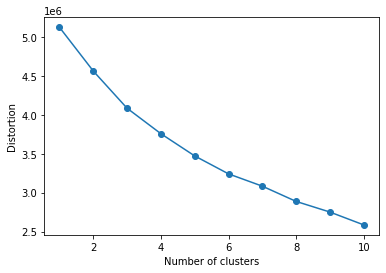

In [24]:
from sklearn.cluster import KMeans

def plot_distortion(X,max_clusters=10):
    distortions = []
    for i in range(1,max_clusters+1):
        km = KMeans(n_clusters=i,init='k-means++',n_init=20,random_state=10)
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(1,max_clusters+1),distortions,marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

plot_distortion(Y_pca,max_clusters=10)

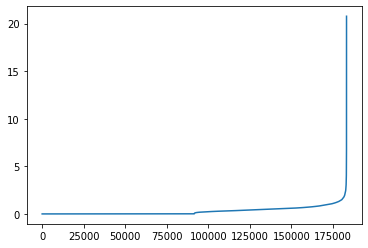

In [25]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Y_pca)
distances, indices = nbrs.kneighbors(Y_pca)
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

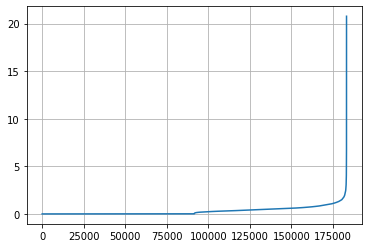

In [28]:
plt.plot(distances)
plt.grid()

In [29]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.7, min_samples=5,metric='euclidean')
y_db = db.fit_predict(Y_pca)
pd.DataFrame(y_db).iloc[:,0].value_counts()

 90     131416
 110     21760
 95       4445
-1        3205
 93       2762
         ...  
 141         5
 41          4
 176         4
 181         4
 58          3
Name: 0, Length: 185, dtype: int64

In [30]:
X_scaled['clusters'] = y_db
X_scaled.head()

,origin_airport_id,dest_airport_id,dep_time,dep_delay,taxi_out,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,is_sunny_dep,is_cloudy_dep,is_rain_dep,is_snow_dep,month,year,rolling_dep_delay_carr-airport,average_dep_delay_airport-month,passengers,day,day_of_week,hour,airport_hourly_traffic,pax-hourly-traffic,9E,AA,AS,AX,B6,C5,DL,EV,F9,G4,G7,MQ,NK,OH,OO,PT,UA,WN,YV,YX,ZW,unknown_delay,unknown_weather,clusters
0,-6.408862,-1.385951,-2.765010,-0.472148,1.047969,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,-0.608387,0.61589,1.287665,-0.032813,-1.109981,0.0,0.659845,2.651987,-1.084292,-1.737404,-1.238186,-2.707084,-3.478169,-3.552068,2.107814,-0.287738,-0.02266,-0.00775,-0.062028,-0.025174,-0.823356,-0.021924,-0.058326,-0.026855,-0.034992,-0.063083,-0.355281,-0.070779,-0.504434,-0.045173,-0.064677,-0.225485,-0.04493,-0.078155,-0.019968,-1.009623,-0.070271,0
1,-6.408862,-0.975810,-2.778181,-0.553011,-0.750815,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,-0.608387,0.61589,1.287665,-0.032813,-1.109981,0.0,-0.699506,2.651987,-0.741432,-1.737404,-1.238186,-2.707084,-3.478169,-3.552068,-0.628236,-0.287738,-0.02266,-0.00775,-0.062028,-0.025174,-0.823356,-0.021924,-0.058326,-0.026855,-0.034992,-0.063083,-0.355281,14.128537,-0.504434,-0.045173,-0.064677,-0.225485,-0.04493,-0.078155,-0.019968,-1.009623,-0.070271,1
2,-6.408862,-1.385951,-2.772913,-0.512580,-0.096712,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,-0.608387,0.61589,-0.966170,-0.032813,-1.109981,0.0,-0.242890,2.651987,-1.084292,-1.611649,-0.690836,-2.707084,-3.358948,-3.510242,2.107814,-0.287738,-0.02266,-0.00775,-0.062028,-0.025174,-0.823356,-0.021924,-0.058326,-0.026855,-0.034992,-0.063083,-0.355281,-0.070779,-0.504434,-0.045173,-0.064677,-0.225485,-0.04493,-0.078155,-0.019968,-1.009623,-0.070271,0
3,-6.408862,-0.975810,-2.649105,-0.431717,-0.750815,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,-0.608387,0.61589,-0.966170,-0.032813,-1.109981,0.0,-0.940935,2.651987,-0.741432,-1.611649,-0.690836,-2.707084,-3.358948,-3.510242,-0.628236,-0.287738,-0.02266,-0.00775,-0.062028,-0.025174,-0.823356,-0.021924,-0.058326,-0.026855,-0.034992,-0.063083,-0.355281,14.128537,-0.504434,-0.045173,-0.064677,-0.225485,-0.04493,-0.078155,-0.019968,-1.009623,-0.070271,1
4,-6.408862,-0.742154,-2.836134,-0.499103,0.557391,-0.167369,-0.053204,-0.114225,-0.01096,-0.159984,-0.608387,0.61589,-0.966170,-0.032813,-1.109981,0.0,1.483853,2.651987,-1.500981,-1.611649,-0.690836,-2.707084,-3.358948,-3.510242,-0.628236,-0.287738,-0.02266,-0.00775,-0.062028,-0.025174,-0.823356,-0.021924,-0.058326,-0.026855,-0.034992,-0.063083,-0.355281,-0.070779,2.404984,-0.045173,-0.064677,-0.225485,-0.04493,-0.078155,-0.019968,-1.009623,-0.070271,-1


In [31]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y)

In [34]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 

colsample_bytree = [0.5]#[0.4,0.5,0.6,0.7]
learning_rate=[0.1]#[0.01,0.1,1.0]
max_depth=[15]#[ 5, 15, 25]
alpha = [10]#[0.1, 1.0, 10]
n_estimators=[200]#[100, 200, 250]
params = dict(objective=['binary:logistic'], colsample_bytree = colsample_bytree, learning_rate=learning_rate, max_depth=max_depth, alpha = alpha, n_estimators=n_estimators)

xgb_model = GridSearchCV(xgb.XGBClassifier(), param_grid=params, n_jobs=-1)
xgb_model.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [10], 'colsample_bytree': [0.5],
                         'learning_rate': [0.1], 'max_depth': [15],
                         'n_estimators': 

In [36]:
from sklearn import metrics
print('Best parameters', xgb_model.best_params_)
y_pred_xgb = xgb_model.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_xgb)*100)
cnf_matrix = metrics.confusion_matrix(y_test,y_pred_xgb)
cnf_matrix

Best parameters {'alpha': 10, 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'objective': 'binary:logistic'}
Accuracy:  99.9868969884912


array([[22896,     0],
       [    6, 22889]])

Text(0.5, 257.44, 'Predicted label')

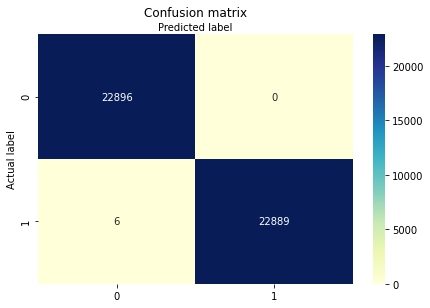

In [39]:
import seaborn as sns
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

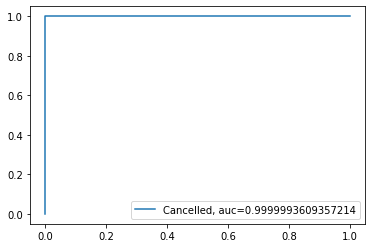

In [40]:
y_pred_proba = xgb_model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='Cancelled, auc='+str(auc))
plt.legend(loc=4)
plt.show()